**This notebook provide the best practices to consume covid-lake API.**

In [1]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

#!pip install scipy
from scipy.stats import pearsonr

In [2]:
# Plotting functions
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[ANALISE-EXPLORATORIA]/python_plotting_functions.ipynb

In [3]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py

dremio = DremioQueryMakerJDBC()
index = dremio.getIndex()
#display(index)
index.head(60)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,VIEW_DEFINITION
0,DREMIO,Covid-Lake,Disease_Indicator,"SELECT createdOn, identifier, valueString, val..."
1,DREMIO,Covid-Lake,hospitalizações,"SELECT * FROM ""hospitalizacoes.csv"""
2,DREMIO,Covid-Lake,Institution,SELECT * FROM logical_entity
3,DREMIO,Covid-Lake,News&Trends,SELECT * FROM logical_entity
4,DREMIO,Covid-Lake,Socioeconomic_Factors,"SELECT createdOn, clean_data_to_FLOAT(valueStr..."
5,DREMIO,covidlake-raw,brasil_io,"SELECT *\nFROM ""brasil.io"""
6,DREMIO,covidlake-raw,cities,"SELECT * FROM ""Base Coordenadas Brasil.parquet"""
7,DREMIO,covidlake-raw,fiocruz_infogripe,SELECT * FROM fiocruz_infogripe
8,DREMIO,covidlake-raw,google_trends,"SELECT * FROM ""google_trends.parquet"""
9,DREMIO,covidlake-raw,health_ministry,SELECT * FROM health_ministry


In [11]:
consumo_industria = dremio.getTable(37)
consumo_industria.head()

,Mes/Ano,Ano,Mes,Industria_Geral,Industria_Extrativa,Industria_de_Transformacao,Industria_Geral_s.a.,Industria_Extrativa_s.a.,Industria_de_Transformação_s.a.
0,jan/1998,1998,jan,64.0,56.3,65.8,70.8,58.4,73.7
1,fev/1998,1998,fev,61.6,57.8,63.1,72.2,62.2,74.5
2,mar/1998,1998,mar,73.8,65.2,76.0,72.6,63.3,74.5
3,abr/1998,1998,abr,70.0,60.4,72.2,71.9,60.5,74.3
4,mai/1998,1998,mai,74.6,61.5,77.1,73.5,64.3,75.6


In [6]:
consumo_industria.dtypes

Mes/Ano                             object
Ano                                 object
Mes                                 object
Industria_Geral                    float64
Industria_Extrativa                float64
Industria_de_Transformacao         float64
Industria_Geral_s.a.               float64
Industria_Extrativa_s.a.           float64
Industria_de_Transformação_s.a.    float64
dtype: object

In [12]:
consumo_industria.shape

(271, 9)

In [13]:
# Checking nulls
consumo_industria.isna().sum()

Mes/Ano                            0
Ano                                0
Mes                                0
Industria_Geral                    0
Industria_Extrativa                0
Industria_de_Transformacao         0
Industria_Geral_s.a.               0
Industria_Extrativa_s.a.           0
Industria_de_Transformação_s.a.    0
dtype: int64

In [14]:
consumo_industria.describe()

,Industria_Geral,Industria_Extrativa,Industria_de_Transformacao,Industria_Geral_s.a.,Industria_Extrativa_s.a.,Industria_de_Transformação_s.a.
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,85.355720,88.427675,85.132103,85.396679,88.456089,85.176384
std,12.859861,16.492308,12.817394,11.122864,16.011941,10.892680
min,56.800000,44.400000,57.500000,66.700000,43.400000,67.500000
25%,75.200000,75.550000,75.650000,75.650000,76.950000,75.900000
50%,83.800000,90.400000,83.300000,84.500000,90.800000,83.600000
75%,94.900000,101.300000,94.500000,94.800000,101.050000,93.700000
max,117.300000,136.600000,117.200000,107.300000,133.800000,106.900000


In [17]:
consumo_industria['Mes'].describe()

count     271
unique     12
top       mar
freq       23
Name: Mes, dtype: object

## Graphs

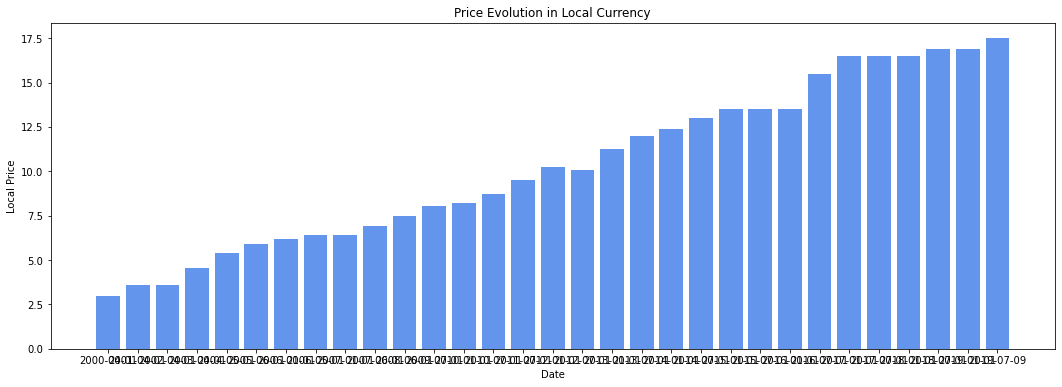

In [37]:
plt.subplots(figsize=(18, 6))

x=big_mac['date']
y=big_mac['local_price']
plt.bar(x,y,color='#6495ED')
plt.title('Price Evolution in Local Currency')
plt.xlabel('Date')
plt.ylabel('Local Price');

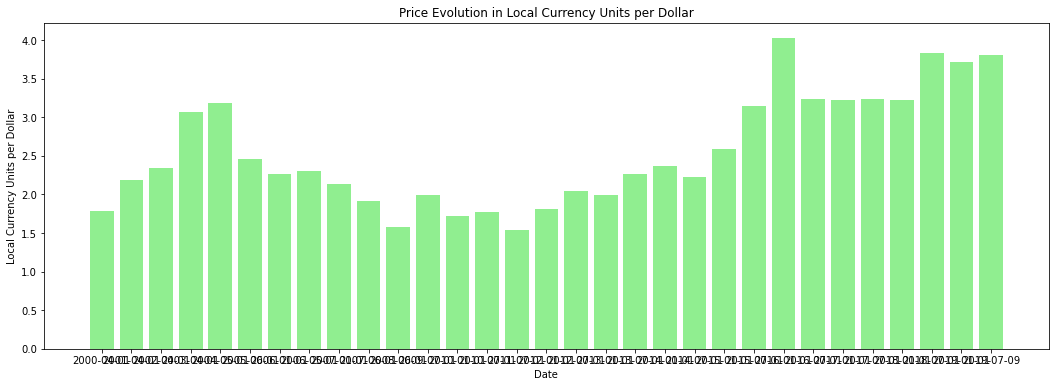

In [39]:
plt.subplots(figsize=(18, 6))

x=big_mac['date']
y=big_mac['dollar_ex']
plt.bar(x,y,color='#90EE90')
plt.title('Price Evolution in Local Currency Units per Dollar')
plt.xlabel('Date')
plt.ylabel('Local Currency Units per Dollar');

### Conclusion

## *Developed by*

 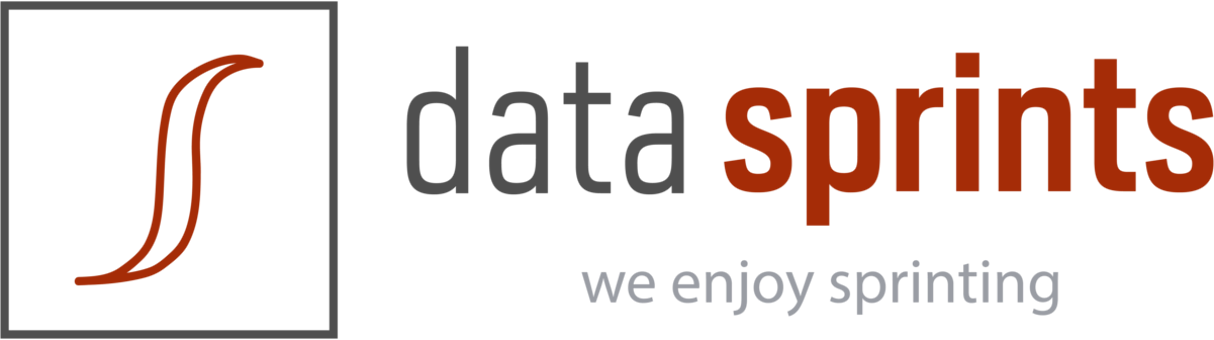